Influencer: 4337, LeaderRank Score: 1.0522015758485848e+20
Influencer: 3653, LeaderRank Score: 7.734516665802254e+19
Influencer: 1199, LeaderRank Score: 7.220487755141181e+19
Influencer: 4313, LeaderRank Score: 7.200458985345861e+19
Influencer: 4338, LeaderRank Score: 6.969479478417321e+19
Influencer: 4328, LeaderRank Score: 5.538882845792545e+19
Influencer: 3743, LeaderRank Score: 5.411155631193228e+19
Influencer: 4358, LeaderRank Score: 4.61739877070478e+19
Influencer: 4346, LeaderRank Score: 4.24202084516121e+19
Influencer: 4277, LeaderRank Score: 3.735002524715386e+19


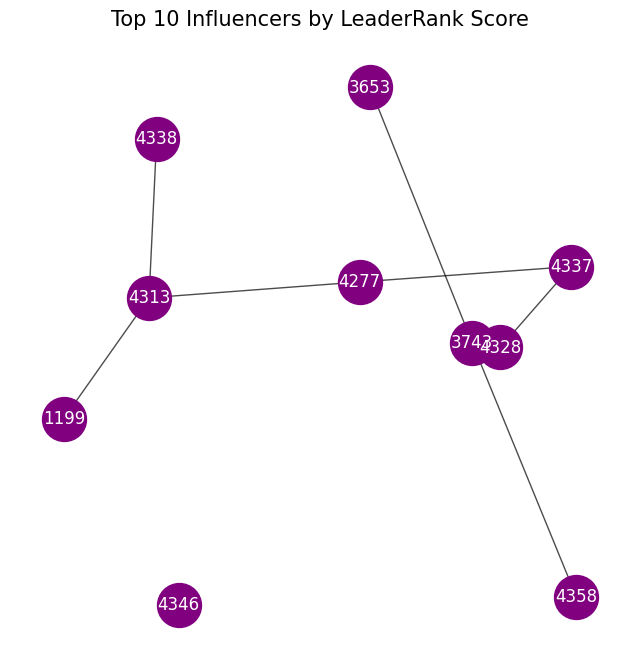

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load your datasets
edges_df = pd.read_csv("/content/sample_data/musae_RU_edges.csv")  # Update the path to your actual dataset
target_df = pd.read_csv("/content/sample_data/musae_RU_target.csv")  # Update the path to your actual dataset

# Create a directed graph
G = nx.DiGraph()

# Step 1: Add edges to the graph
G.add_edges_from(edges_df[['from', 'to']].values)

# Step 2: Ensure all influencers in target_df are added as nodes
for influencer_id in target_df['id']:
    if influencer_id not in G:
        G.add_node(influencer_id)

# Step 3: Add attributes from the target dataset to the graph nodes
for idx, row in target_df.iterrows():
    influencer_id = row['id']
    G.nodes[influencer_id].update(row.to_dict())

# Step 4: Calculate LeaderRank (iterative approach similar to PageRank)
# Initialize LeaderRank scores for each node
leader_rank_scores = {node: 1.0 for node in G.nodes()}

# Set damping factor (typically between 0.5 and 0.9)
damping_factor = 0.85
iterations = 100  # Number of iterations to run

for _ in range(iterations):
    new_scores = {}
    for node in G.nodes():
        # Calculate the LeaderRank score for the node
        incoming_sum = sum(leader_rank_scores.get(neighbor, 0) for neighbor in G.predecessors(node))
        new_scores[node] = (1 - damping_factor) + damping_factor * incoming_sum
    leader_rank_scores = new_scores

# Step 5: Sort nodes by LeaderRank score in descending order
sorted_leader_rank = sorted(leader_rank_scores.items(), key=lambda x: x[1], reverse=True)

# Step 6: Display the top influencers
top_10_influencers = sorted_leader_rank[:10]
for influencer, score in top_10_influencers:
    print(f'Influencer: {influencer}, LeaderRank Score: {score}')

# Step 7: Visualize the top 10 nodes using LeaderRank scores
top_10_nodes = [node for node, score in top_10_influencers]
G_top_10 = G.subgraph(top_10_nodes)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G_top_10, seed=42)
nx.draw_networkx_nodes(G_top_10, pos, node_size=1000, node_color='purple')
nx.draw_networkx_edges(G_top_10, pos, alpha=0.7)
nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_color='white')
plt.title("Top 10 Influencers by LeaderRank Score", fontsize=15)
plt.axis('off')
plt.show()